# The Mauna Loa CO_2 Concentration (Autograded and Written Report)

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error 
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('./data/CO2.csv', na_values=-99.99, skipinitialspace=True)
df = df.dropna() # Drop NaN values
df.shape, df.columns

((733, 10),
 Index(['Yr', 'Mn', 'Date_Excel', 'Date', 'CO2[ppm]',
        'seasonally_adjusted[ppm]', 'fit[ppm]', 'seasonally_adjusted_fit[ppm]',
        'CO2_filled[ppm]', 'seasonally_adjusted_filled[ppm]'],
       dtype='object'))

### Cleaning

In [19]:
co2 = df[['Yr', 'Mn', 'Date', 'CO2[ppm]']].copy()
co2['Time'] = (co2.Yr - 1958) + (co2.Mn-1)/12
# co2["Time"] = (co2["Mn"]+0.5)/12
co2.columns

Index(['Yr', 'Mn', 'Date', 'CO2[ppm]', 'Time'], dtype='object')

### Train/Test split

In [20]:
df_train, df_test = train_test_split(co2, test_size=0.2, shuffle=False)
train, test = train_test_split(co2, test_size=0.2, shuffle=False)

co2_X = co2["Time"].values.reshape(-1,1)
co2_y = co2["CO2[ppm]"]

X_train = train["Time"].values.reshape(-1, 1)
y_train = train["CO2[ppm]"]

X_test = test["Time"].values.reshape(-1, 1)
y_test = test["CO2[ppm]"]

### User defined functions

In [33]:
def showResidualPlot(X,y,ypred):
    residual = y - ypred
    plt.title("Residual plot")
    plt.scatter(X, residual, color='red',s=3,alpha=0.6)
    plt.ylabel("Residual")
    plt.xlabel("Time")
    plt.show()

def showMetrics(y,ypred):
    rmse = mean_squared_error(y,ypred,squared=False)
    mape = mean_absolute_percentage_error(y,ypred) * 100
    print("RMSE = ", rmse)
    print("MAPE = ", mape)
    

## Linear Regression model

In [21]:
reg = LinearRegression().fit(X_train, y_train)

# training results 
print("Training results:\n=====================")
print("Score = ",reg.score(co2_X,co2_y))
print("theta = ",reg.coef_)
print("theta_0 = ",reg.intercept_)

# test results 
print("Test Data results:\n=====================")
print("Score = ",reg.score(X_test,y_test))
print("theta = ",reg.coef_)
print("theta_0 = ",reg.intercept_)

Training results:
Score =  0.9613065290189474
theta =  [1.40516508]
theta_0 =  309.0758430993236
Test Data results:
Score =  -0.4990441099535623
theta =  [1.40516508]
theta_0 =  309.0758430993236


Plot the resisual error R_linear = C(t) - F(t)

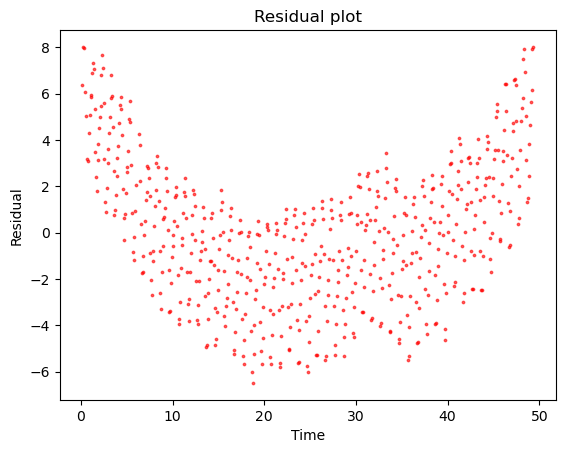

In [34]:
X = X_train
y = y_train
y_pred = reg.predict(X)
showResidualPlot(X,y,y_pred)

RMSE and MAPE 

In [35]:
y_pred = reg.predict(X_test)
showMetrics(y_test,y_pred)

RMSE =  10.662711215267501
MAPE =  2.4569732304013896


## Quadratic model

In [53]:
# quad = np.poly1d(np.polyfit(train["Time"], y_train, 2))
degree=2
quad_2=make_pipeline(PolynomialFeatures(degree),LinearRegression())
quad_2.fit(X_train,y_train)

print("theta = ", list(quad_2.named_steps.linearregression.coef_))
print("theta_0 = ", quad_2.named_steps.linearregression.intercept_)

# Expected result =>  (0.012)X^2 + (0.801)X + 314.100584

theta =  [0.0, 0.8051907879829697, 0.012065266146308672]
theta_0 =  314.120789818441


Plot the resisual error

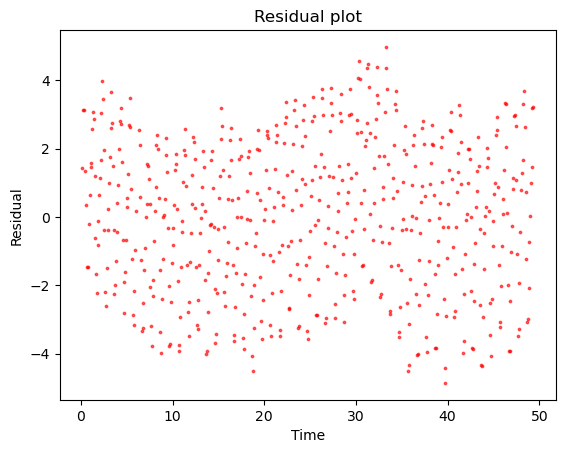

In [36]:
y_pred = quad_2.predict(X_train)
showResidualPlot(X_train,y_train,y_pred)

RMSE and MAPE 

In [41]:
y_pred = quad_2.predict(X_test)
showMetrics(y_test,y_pred)

RMSE =  2.5293338568487185
MAPE =  0.5388016288272892


## Cubic model

In [68]:
# cube = np.poly1d(np.polyfit(train["Time"], y_train, 3))
# print(cube)

degree=3
cube=make_pipeline(PolynomialFeatures(degree),LinearRegression())
cube.fit(X_train,y_train)

print("theta = ", list(cube.named_steps.linearregression.coef_))
print("theta_0 = ", cube.named_steps.linearregression.intercept_)


# # expected result =>  -0.0001184 x^3 + 0.02097 x^2 + 0.6231 x + 314.8348
# #  b0 = 314.834891, b1 = 6.23122450e-01, b2 = 2.09772451e-02, b3 = -0.0001183233973960


theta =  [0.0, 0.6198159023446597, 0.02135165213276171, -0.00012471498198698703]
theta_0 =  314.9079514261144


Plot the resisual error

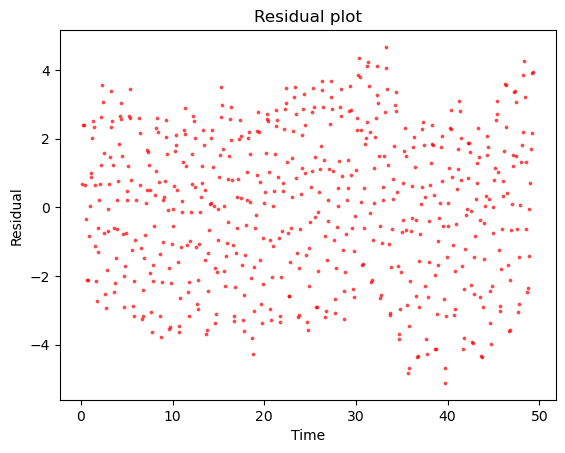

In [71]:
# use this if the model is defined using polynomialFeatures
y_pred = cube.predict(X_train) 
showResidualPlot(X_train,y_train,y_pred)

# # use this if the model is define using numpy polyfit
# y_pred = cube(X_train.reshape(-1, 1)) 
# showResidualPlot(X_train,np.array(y_train).reshape(-1, 1),y_pred)

RMSE and MAPE 

In [73]:
## Expected result =>  RMSE = 4.151525, MAPE = 0.8487342 %

# use this if the model is defined using polynomialFeatures
y_pred = cube.predict(X_test) 
showMetrics(y_test,y_pred)

# # use this if the model is define using numpy polyfit
# y_pred = cube(X_test.reshape(-1, 1)) 
# showMetrics(np.array(y_test).reshape(-1, 1),y_pred)

RMSE =  4.3235345663853035
MAPE =  0.884528218742057


Based on the results above, the inference are:

- Residues R_linear shows a systematic concave upward trend, R_quadratic does not have a clear systematic trend, and  R_cubic closely resembles R_quadratic in terms of both trend and magnitude.

- Based on the residual plots drawn above and the prediction errors reported, the lowest degree polunomial that seems to be sufficient to represent the data is quadratic model (degree 2)

## Periodic Signal

The model we will be using is quadratic based on the inference from the above results

In [94]:
# de-trend 
residual = train[["Mn"]].copy()
y_pred = quad_2.predict(X_train)
residual["res"] =  y_train-y_pred
P = residual.groupby('Mn').mean().copy()

# de-season
residual["de_seasoned"] = residual["res"].values.reshape(-1,1) - P.iloc[residual["Mn"]-1].values.reshape(-1,1)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
P.index = months
print(P)
# expected answer => P['Jan'] = -0.015647, P['Feb']= 0.641500


          res
Jan -0.008690
Feb  0.650717
Mar  1.360103
Apr  2.566436
May  2.987465
Jun  2.317286
Jul  0.780276
Aug -1.297194
Sep -3.124015
Oct -3.305577
Nov -2.077344
Dec -0.917321


Plot the periodic signal

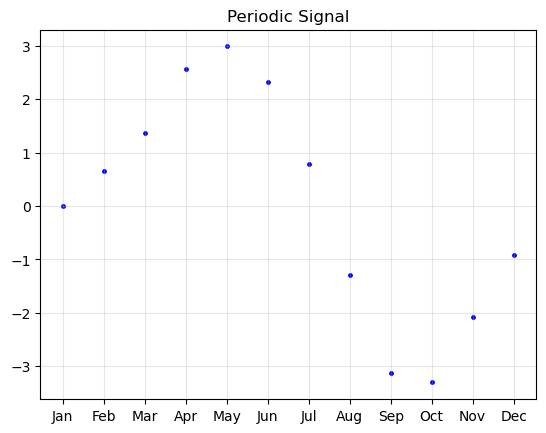

In [95]:
plt.title("Periodic Signal")
plt.scatter(months,P,color="blue", s=6)
plt.grid(alpha=0.3)
plt.show()

plotting de-trending

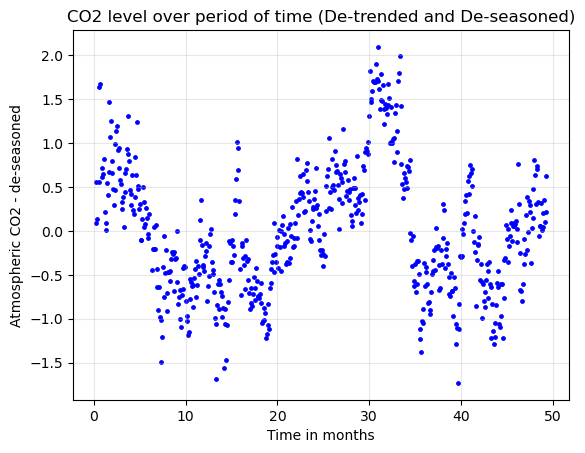

In [97]:
plt.title("CO2 level over period of time (De-trended and De-seasoned)")
plt.scatter(X_train,residual["de_seasoned"],color="blue", s=6)
plt.grid(alpha=0.3)
plt.xlabel("Time in months")
plt.ylabel("Atmospheric CO2 - de-seasoned")
plt.show()

## Final Model = Periodic + Trend

In [114]:
model2 = np.poly1d(np.polyfit(train["Time"], y_train, 2))

residual = co2.copy()
X_final = residual["Time"].values.reshape(-1, 1)
y_final = residual["CO2[ppm]"]

y_pred = model2(X_final)
residual["res"] = y_final.values.reshape(-1,1) -y_pred
P = residual [["Mn", "res"]].groupby('Mn').mean().copy()
final_mode = y_pred + P.iloc[residual["Mn"]-1].values.reshape(-1,1)


plot the final model

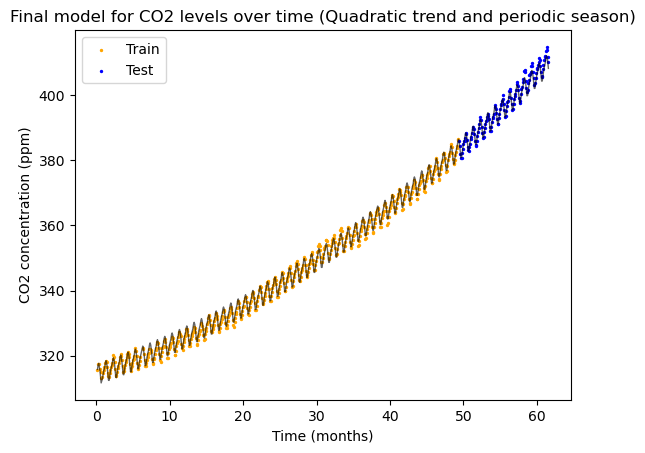

In [115]:
# plot the final model
plt.title("Final model for CO2 levels over time (Quadratic trend and periodic season)")
plt.xlabel("Time (months)")
plt.ylabel("CO2 concentration (ppm)")
plt.scatter(X_train, y_train, color='orange', label='Train', s=2)
plt.scatter(X_test, y_test, color='blue', label='Test', s=2)
plt.plot(X_final,final_mode, color = "black", alpha=0.6, linewidth=1)
plt.legend()
plt.show()

Decomposition of test data

In [118]:
# RMSE and MAPE 
y_pred_test = model2(X_test)
test["res"] = y_test.values.reshape(-1,1) -y_pred_test
P_test = test [["Mn", "res"]].groupby('Mn').mean().copy()
final_mode = y_pred_test + P_test.iloc[test["Mn"]-1].values.reshape(-1,1)
showMetrics(y_test,final_mode)

RMSE =  0.8609035738042411
MAPE =  0.1817912507425252


In [119]:
F_range = y_pred_test.max()-y_pred_test.min()
print("Range of F(t):")
print ("max = {}, min = {}, range = {}".format(y_pred_test.max(), y_pred_test.min(), F_range))

amp_P = P_test.max()+np.abs(P_test.min())/2
print("Amplitude  of P = {}".format(amp_P))

print("Range of residual R:")
R_range = test["res"].max()-test["res"].min()
print (" max = {}, min = {}, range = {}".format(test["res"].max(), test["res"].min(), R_range))

ratio_F_P = (F_range/amp_P)
print("Ratio F/P= {}".format(ratio_F_P))

ratio_P_R = amp_P/R_range
print("Ratio P/R= {}".format(ratio_P_R))



Range of F(t):
max = 409.46472815817134, min = 383.3740983071221, range = 26.090629851049243
Amplitude  of P = res    5.607407
dtype: float64
Range of residual R:
 max = 5.937325113111967, min = -3.770949915508197, range = 9.708275028620164
Ratio F/P= res    4.652886
dtype: float64
Ratio P/R= res    0.57759
dtype: float64


Decomposition of train data

In [120]:
# RMSE and MAPE 
y_pred_train = model2(X_train)
train["res"] = y_train.values.reshape(-1,1) -y_pred_train
P_train = train [["Mn", "res"]].groupby('Mn').mean().copy()
f_t_train = y_pred_train + P_train.iloc[train["Mn"]-1].values.reshape(-1,1)
showMetrics(y_train,f_t_train)

# decomposition
F_range = y_pred_train.max()-y_pred_train.min()
print("Range of F(t):")
print ("max = {}, min = {}, range = {}".format(y_pred_train.max(), y_pred_train.min(), F_range))

amp_P = P_train.max()+np.abs(P_train.min())/2
print("Amplitude  of P = {}".format(amp_P))

print("Range of residual R:")
R_range = train["res"].max()-train["res"].min()
print (" max = {}, min = {}, range = {}".format(train["res"].max(), train["res"].min(), R_range))

ratio_F_P = (F_range/amp_P)
print("Ratio F/P= {}".format(ratio_F_P))

ratio_P_R = amp_P/R_range
print("Ratio P/R= {}".format(ratio_P_R))


RMSE =  0.7142456354683048
MAPE =  0.16874558062851852
Range of F(t):
max = 383.20771198879453, min = 314.25532342938624, range = 68.95238855940829
Amplitude  of P = res    4.640253
dtype: float64
Range of residual R:
 max = 4.973665975117228, min = -4.854050397084961, range = 9.82771637220219
Ratio F/P= res    14.859617
dtype: float64
Ratio P/R= res    0.47216
dtype: float64
